<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


np.int64(1)

,user_id,age,country,purchases,revenue


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: proportion, dtype: float64

country
CN    1054.00
DE    1445.50
FR     675.92
RU     790.08
US     557.38
Name: revenue, dtype: float64

age_group
31–45    14
19–30    13
46–60     9
0–18      2
60+       1
Name: count, dtype: int64

age_group
0–18     1296.000000
19–30     565.538462
31–45    1108.214286
46–60     605.777778
60+       785.000000
Name: revenue, dtype: float64

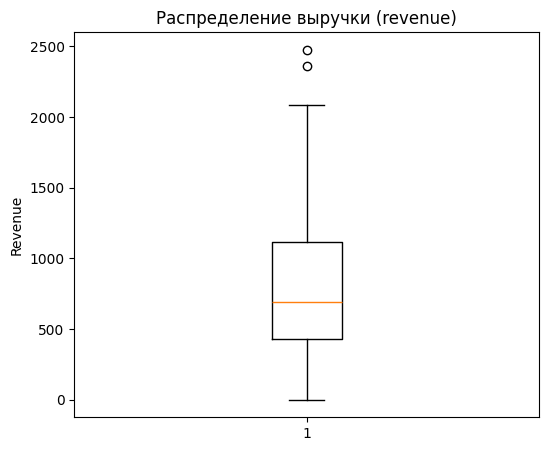

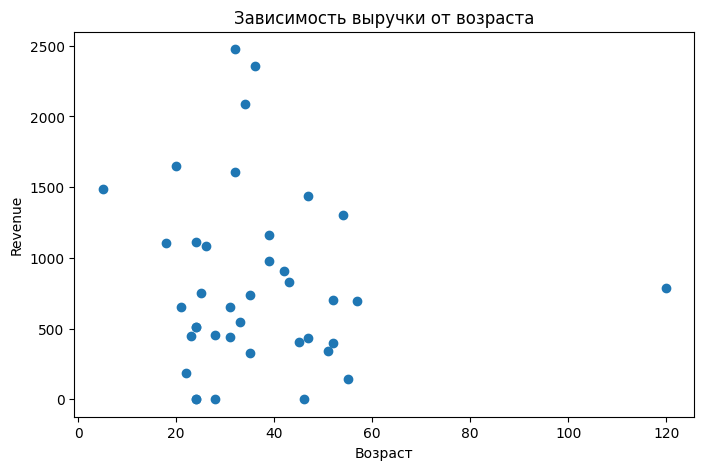

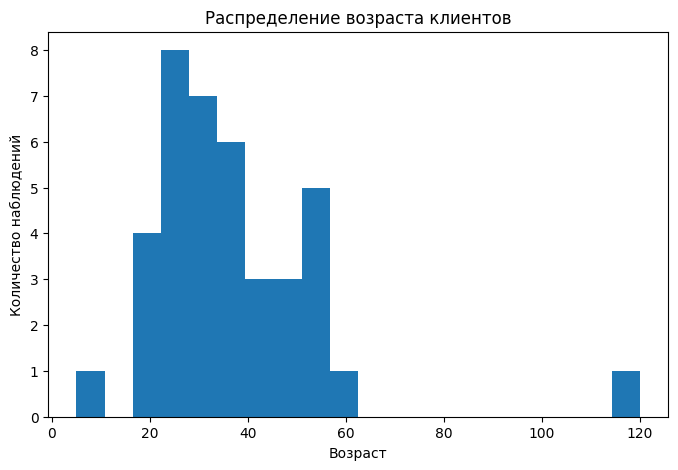

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../../project/data/S02-hw-dataset.csv")
df.head()
df.info()
display(df.isna().mean() * 100)
display(df.describe())
display(df.duplicated().sum())
display(df[df['age'] < 0])
display(df[df['age'] > 100])
display(df[df['purchases'] < 0])
display(df[(df['purchases'] > 0) & (df['revenue'] == 0)])
# Были найдены подозрительные случаи в данном датасете; purchases == -1, age == 120, а также при нулевом количестве доходов были совершенны покупки.
display(df['country'].value_counts(normalize = True))
# Самая популярная страна это Россия, около ≈ 31%
display(df.groupby("country")["revenue"].mean().round(2))
# У китая самый большой средний доход
bins = [0, 18, 30, 45, 60, 120]
labels = ['0–18', '19–30', '31–45', '46–60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
display(df["age_group"].value_counts()) # Группа 31-45 лет имеет самое большое кол-во участников
display(df.groupby('age_group', observed=False)['revenue'].mean()) # Самый большой средний доход имеет группа лиц возрастом от 0-18 лет (почему-то....)

plt.figure(figsize=(6, 5))
plt.boxplot(df['revenue'])
plt.title("Распределение выручки (revenue)")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['revenue'])
plt.title("Зависимость выручки от возраста")
plt.xlabel("Возраст")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20)
plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст")
plt.ylabel("Количество наблюдений")
plt.savefig("figures/age_histogram.png", dpi=300, bbox_inches='tight')
plt.show()
